In [69]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("./Data/all_energy_statistics.csv")
df.head()

country_or_area               commodity_transaction  year  \
0         Austria  Additives and Oxygenates - Exports  1996   
1         Austria  Additives and Oxygenates - Exports  1995   
2         Belgium  Additives and Oxygenates - Exports  2014   
3         Belgium  Additives and Oxygenates - Exports  2013   
4         Belgium  Additives and Oxygenates - Exports  2012   

                     unit  quantity  quantity_footnotes  \
0  Metric tons,  thousand       5.0                 NaN   
1  Metric tons,  thousand      17.0                 NaN   
2  Metric tons,  thousand       0.0                 NaN   
3  Metric tons,  thousand       0.0                 NaN   
4  Metric tons,  thousand      35.0                 NaN   

                   category  
0  additives_and_oxygenates  
1  additives_and_oxygenates  
2  additives_and_oxygenates  
3  additives_and_oxygenates  
4  additives_and_oxygenates

In [17]:
#Drop the column that majorly include null value
df.drop("quantity_footnotes", axis=1, inplace=True)

In [18]:
df['category'].value_counts()

total_electricity                  133916
gas_oil_diesel_oil                  97645
fuel_oil                            75132
natural_gas_including_lng           64161
liquified_petroleum_gas             62156
                                    ...  
uranium                               684
geothermal                            496
gas_coke                              365
other_coal_products                   105
tide_wave_and_ocean_electricity        58
Name: category, Length: 71, dtype: int64

In [19]:
df['commodity_transaction'].value_counts()

From combustible fuels – Main activity                                                              6601
Electricity - Gross demand                                                                          5532
Electricity - Gross production                                                                      5523
Electricity - Own use by electricity, heat and CHP plants                                           5523
Electricity - net production                                                                        5523
                                                                                                    ... 
Paraffin waxes - Consumption by machinery                                                              1
White spirit and special boiling point industrial spirits - Consumption by mining and quarrying        1
Kerosene-type Jet Fuel - Own use by oil and gas extraction                                             1
Charcoal - Consumption by non-ferrous metals           

In [23]:
Total_Electricity = df[df.category.isin(["total_electricity"])].sort_values(['year',"country_or_area"])
Total_Electricity.head()

country_or_area                              commodity_transaction  \
1039413     Afghanistan  Electricity - Consumption by commercial and pu...   
1045346     Afghanistan            Electricity - Consumption by households   
1061045     Afghanistan                 Electricity - Consumption by other   
1079371     Afghanistan  Electricity - Consumption in agriculture, fore...   
1091796     Afghanistan             Electricity - Final energy consumption   

         year                     unit  quantity           category  
1039413  1990  Kilowatt-hours, million      90.0  total_electricity  
1045346  1990  Kilowatt-hours, million     282.0  total_electricity  
1061045  1990  Kilowatt-hours, million     404.0  total_electricity  
1079371  1990  Kilowatt-hours, million      32.0  total_electricity  
1091796  1990  Kilowatt-hours, million     404.0  total_electricity

In [28]:
Energy_consumption = Total_Electricity[Total_Electricity.commodity_transaction == "Electricity - Final energy consumption"]
Energy_consumption.head()

country_or_area                   commodity_transaction  year  \
1091796     Afghanistan  Electricity - Final energy consumption  1990   
1091821         Albania  Electricity - Final energy consumption  1990   
1091846         Algeria  Electricity - Final energy consumption  1990   
1091871  American Samoa  Electricity - Final energy consumption  1990   
1091896         Andorra  Electricity - Final energy consumption  1990   

                            unit  quantity           category  
1091796  Kilowatt-hours, million     404.0  total_electricity  
1091821  Kilowatt-hours, million    2500.0  total_electricity  
1091846  Kilowatt-hours, million   12320.0  total_electricity  
1091871  Kilowatt-hours, million      85.0  total_electricity  
1091896  Kilowatt-hours, million     259.0  total_electricity

In [34]:
Energy_consumption['year'].value_counts()

2012    229
2013    229
2014    229
2011    226
2010    226
2009    226
2007    226
2008    226
2006    225
2005    225
2002    224
2004    224
2003    224
2001    221
2000    220
1999    219
1994    218
1996    218
1995    218
1997    218
1998    218
1992    217
1993    217
1991    190
1990    186
Name: year, dtype: int64

# Portion Energy Consumption 2014

In [37]:
Energy_consumption_2014 = Energy_consumption[Energy_consumption.year == 2014]
Energy_consumption_2014.head()

country_or_area                   commodity_transaction  year  \
1091772     Afghanistan  Electricity - Final energy consumption  2014   
1091797         Albania  Electricity - Final energy consumption  2014   
1091822         Algeria  Electricity - Final energy consumption  2014   
1091847  American Samoa  Electricity - Final energy consumption  2014   
1091872         Andorra  Electricity - Final energy consumption  2014   

                            unit   quantity           category  
1091772  Kilowatt-hours, million   3767.300  total_electricity  
1091797  Kilowatt-hours, million   6523.200  total_electricity  
1091822  Kilowatt-hours, million  45733.000  total_electricity  
1091847  Kilowatt-hours, million    134.769  total_electricity  
1091872  Kilowatt-hours, million    474.499  total_electricity

In [40]:
total_consumpution_2014 = sum(Energy_consumption_2014['quantity'])

In [170]:
Energy_consumption_2014['portion'] = Energy_consumption_2014['quantity'] / total_consumpution_2014
Energy_consumption_2014.sort_values(['portion'],ascending=False).head(10)

/home/lixi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


country_or_area                   commodity_transaction    year  \
1092790               China  Electricity - Final energy consumption  2014.0   
1097010       United States  Electricity - Final energy consumption  2014.0   
1094271               Japan  Electricity - Final energy consumption  2014.0   
1094058               India  Electricity - Final energy consumption  2014.0   
1095890  Russian Federation  Electricity - Final energy consumption  2014.0   
1093656             Germany  Electricity - Final energy consumption  2014.0   
1092440              Brazil  Electricity - Final energy consumption  2014.0   
1092665              Canada  Electricity - Final energy consumption  2014.0   
1094443  Korea, Republic of  Electricity - Final energy consumption  2014.0   
1093508              France  Electricity - Final energy consumption  2014.0   

                            unit   quantity           category   portion  
1092790  Kilowatt-hours, million  4686376.1  total_electricity  0.236818  
1097010  Kilowatt-hours, million  3787793.0  total_electricity  0.191410  
1094271  Kilowatt-hours, million   951487.0  total_electricity  0.048082  
1094058  Kilowatt-hours, million   948327.0  total_electricity  0.047922  
1095890  Kilowatt-hours, million   737830.0  total_electricity  0.037285  
1093656  Kilowatt-hours, million   512835.0  total_electricity  0.025915  
1092440  Kilowatt-hours, million   501399.0  total_electricity  0.025337  
1092665  Kilowatt-hours, million   489239.0  total_electricity  0.024723  
1094443  Kilowatt-hours, million   486834.0  total_electricity  0.024601  
1093508  Kilowatt-hours, million   415325.0  total_electricity  0.020988

# Evolution Energy Consumption 1990-2014

In [60]:
US_Consumption = Energy_consumption[Energy_consumption.country_or_area == "United States"].sort_values("year")
China_Consumption = Energy_consumption[Energy_consumption.country_or_area == "China"].sort_values("year")
Germany_Consumption = Energy_consumption[Energy_consumption.country_or_area == "Germany"].sort_values("year")
Japan_Consumption=Energy_consumption[Energy_consumption.country_or_area == "Japan"].sort_values("year")
India_Consumption=Energy_consumption[Energy_consumption.country_or_area == "India"].sort_values("year")
Russia_Consumption= Energy_consumption[Energy_consumption.country_or_area == "Russian Federation"].sort_values("year")
Brazil_Consumption= Energy_consumption[Energy_consumption.country_or_area == "Brazil"].sort_values("year")
France_Consumption= Energy_consumption[Energy_consumption.country_or_area == "France"].sort_values("year")
Canada_Consumption=Energy_consumption[Energy_consumption.country_or_area == "Canada"].sort_values("year")
Korea_Consumption=Energy_consumption[Energy_consumption.country_or_area == "Korea"].sort_values("year")

In [61]:
x1 = US_Consumption.year
y1 = US_Consumption.quantity
x2 = China_Consumption.year
y2 = China_Consumption.quantity
x3 = Germany_Consumption.year
y3 = Germany_Consumption.quantity
x4 = Japan_Consumption.year
y4 = Japan_Consumption.quantity
x5 = India_Consumption.year
y5 = India_Consumption.quantity
x6 = Russia_Consumption.year
y6 = Russia_Consumption.quantity
x7 = Brazil_Consumption.year
y7 = Brazil_Consumption.quantity
x8 = France_Consumption.year
y8 = France_Consumption.quantity
x9 = Canada_Consumption.year
y9 = Canada_Consumption.quantity
x10 = Korea_Consumption.year
y10 = Korea_Consumption.quantity

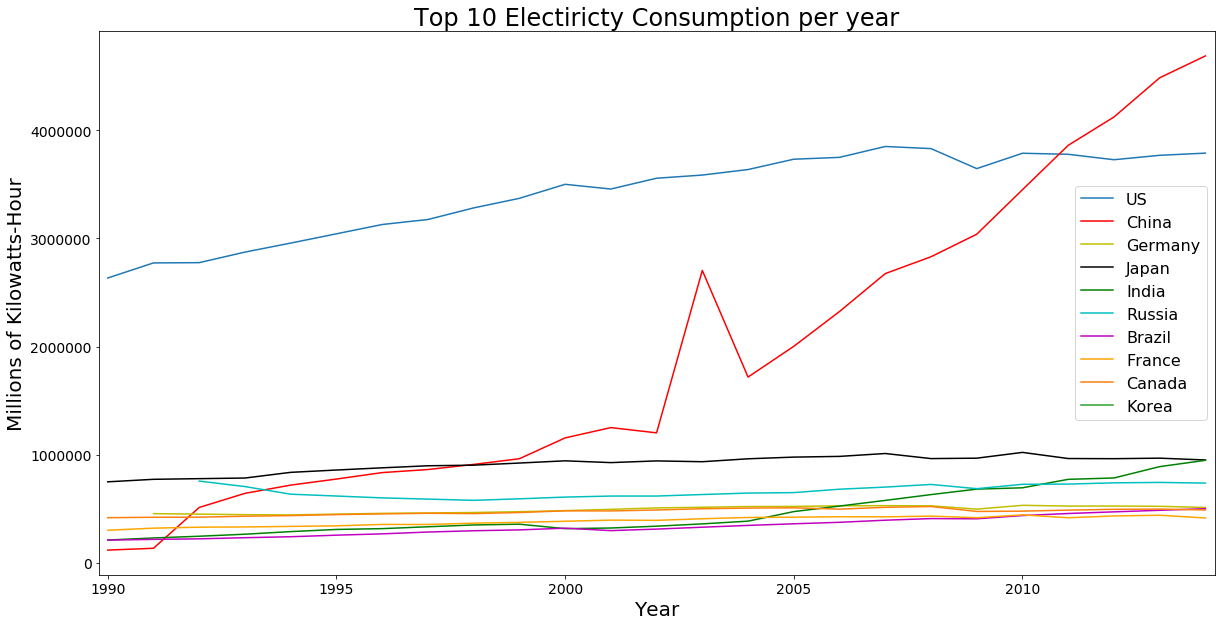

In [82]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(x1,y1,label="US")
plt.plot(x2,y2,'r',label="China")
plt.plot(x3,y3,'y',label="Germany")
plt.plot(x4,y4,'k',label="Japan")
plt.plot(x5,y5,'g',label="India")
plt.plot(x6,y6,'c',label="Russia")
plt.plot(x7,y7,'m',label="Brazil")
plt.plot(x8,y8,'orange',label="France")
plt.plot(x9,y9,label="Canada")
plt.plot(x10,y10,label="Korea")

plt.legend(fontsize=16)
plt.ylabel("Millions of Kilowatts-Hour",fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Top 10 Electiricty Consumption per year',fontsize=24)
plt.xlim(1989.8, 2014.2)
fig = plt.gcf()
plt.show()

In [84]:
fig.savefig('Top 10 Electiricty Consumption per year.png')

# Evolution Energy Production 1990-2014

In [146]:
conventional_crude=df[df.category=="total_electricity"].sort_values("year")
conventional_crude["commodity_transaction"].value_counts().head(10)

Electricity - Gross demand                                   5532
Electricity - Gross production                               5523
Electricity - net production                                 5523
Electricity - total production, main activity                5523
Electricity - Own use by electricity, heat and CHP plants    5523
Electricity - Final energy consumption                       5499
Electricity - Consumption by other                           5491
From combustible fuels – Main activity                       5469
Electricity - Consumption by households                      5180
Electricity - Losses                                         5168
Name: commodity_transaction, dtype: int64

In [154]:
Energy_production = Total_Electricity[Total_Electricity.commodity_transaction == "Electricity - net production"]
Energy_production.head()

country_or_area         commodity_transaction  year  \
1116195     Afghanistan  Electricity - net production  1990   
1116220         Albania  Electricity - net production  1990   
1116245         Algeria  Electricity - net production  1990   
1116270  American Samoa  Electricity - net production  1990   
1116295         Andorra  Electricity - net production  1990   

                            unit  quantity           category  
1116195  Kilowatt-hours, million    1055.0  total_electricity  
1116220  Kilowatt-hours, million    3197.0  total_electricity  
1116245  Kilowatt-hours, million   14966.0  total_electricity  
1116270  Kilowatt-hours, million      98.0  total_electricity  
1116295  Kilowatt-hours, million     120.0  total_electricity

In [155]:
Energy_production_2014 = Energy_production[Energy_production.year == 2014]
Energy_production_2014.head()

country_or_area         commodity_transaction  year  \
1116171     Afghanistan  Electricity - net production  2014   
1116196         Albania  Electricity - net production  2014   
1116221         Algeria  Electricity - net production  2014   
1116246  American Samoa  Electricity - net production  2014   
1116271         Andorra  Electricity - net production  2014   

                            unit   quantity           category  
1116171  Kilowatt-hours, million    776.000  total_electricity  
1116196  Kilowatt-hours, million   4724.430  total_electricity  
1116221  Kilowatt-hours, million  57675.000  total_electricity  
1116246  Kilowatt-hours, million    147.364  total_electricity  
1116271  Kilowatt-hours, million    126.800  total_electricity

In [156]:
total_production_2014 = sum(Energy_production_2014['quantity'])

In [157]:
Energy_production_2014['portion'] = Energy_production_2014['quantity'] / total_production_2014
Energy_production_2014.sort_values(['portion'],ascending=False).head(10)

/home/lixi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


country_or_area         commodity_transaction  year  \
1117191               China  Electricity - net production  2014   
1121427       United States  Electricity - net production  2014   
1118473               India  Electricity - net production  2014   
1118686               Japan  Electricity - net production  2014   
1120299  Russian Federation  Electricity - net production  2014   
1117066              Canada  Electricity - net production  2014   
1118060             Germany  Electricity - net production  2014   
1116841              Brazil  Electricity - net production  2014   
1117911              France  Electricity - net production  2014   
1118858  Korea, Republic of  Electricity - net production  2014   

                            unit   quantity           category   portion  
1117191  Kilowatt-hours, million  5230504.0  total_electricity  0.230731  
1121427  Kilowatt-hours, million  4122391.0  total_electricity  0.181850  
1118473  Kilowatt-hours, million  1278907.0  total_electricity  0.056416  
1118686  Kilowatt-hours, million  1006879.0  total_electricity  0.044416  
1120299  Kilowatt-hours, million   994657.0  total_electricity  0.043877  
1117066  Kilowatt-hours, million   636960.0  total_electricity  0.028098  
1118060  Kilowatt-hours, million   591952.0  total_electricity  0.026113  
1116841  Kilowatt-hours, million   581854.0  total_electricity  0.025667  
1117911  Kilowatt-hours, million   539416.0  total_electricity  0.023795  
1118858  Kilowatt-hours, million   530007.0  total_electricity  0.023380

In [158]:
US_production = Energy_production[Energy_production.country_or_area == "United States"].sort_values("year")
China_production = Energy_production[Energy_production.country_or_area == "China"].sort_values("year")
Germany_production = Energy_production[Energy_production.country_or_area == "Germany"].sort_values("year")
Japan_production=Energy_production[Energy_production.country_or_area == "Japan"].sort_values("year")
India_production=Energy_production[Energy_production.country_or_area == "India"].sort_values("year")
Russia_production= Energy_production[Energy_production.country_or_area == "Russian Federation"].sort_values("year")
Brazil_production= Energy_production[Energy_production.country_or_area == "Brazil"].sort_values("year")
France_production= Energy_production[Energy_production.country_or_area == "France"].sort_values("year")
Canada_production=Energy_production[Energy_production.country_or_area == "Canada"].sort_values("year")
Korea_production=Energy_production[Energy_production.country_or_area == "Korea"].sort_values("year")

In [159]:
x1 = US_production.year
y1 = US_production.quantity
x2 = China_production.year
y2 = China_production.quantity
x3 = Germany_production.year
y3 = Germany_production.quantity
x4 = Japan_production.year
y4 = Japan_production.quantity
x5 = India_production.year
y5 = India_production.quantity
x6 = Russia_production.year
y6 = Russia_production.quantity
x7 = Brazil_production.year
y7 = Brazil_production.quantity
x8 = France_production.year
y8 = France_production.quantity
x9 = Canada_production.year
y9 = Canada_production.quantity
x10 = Korea_production.year
y10 = Korea_production.quantity

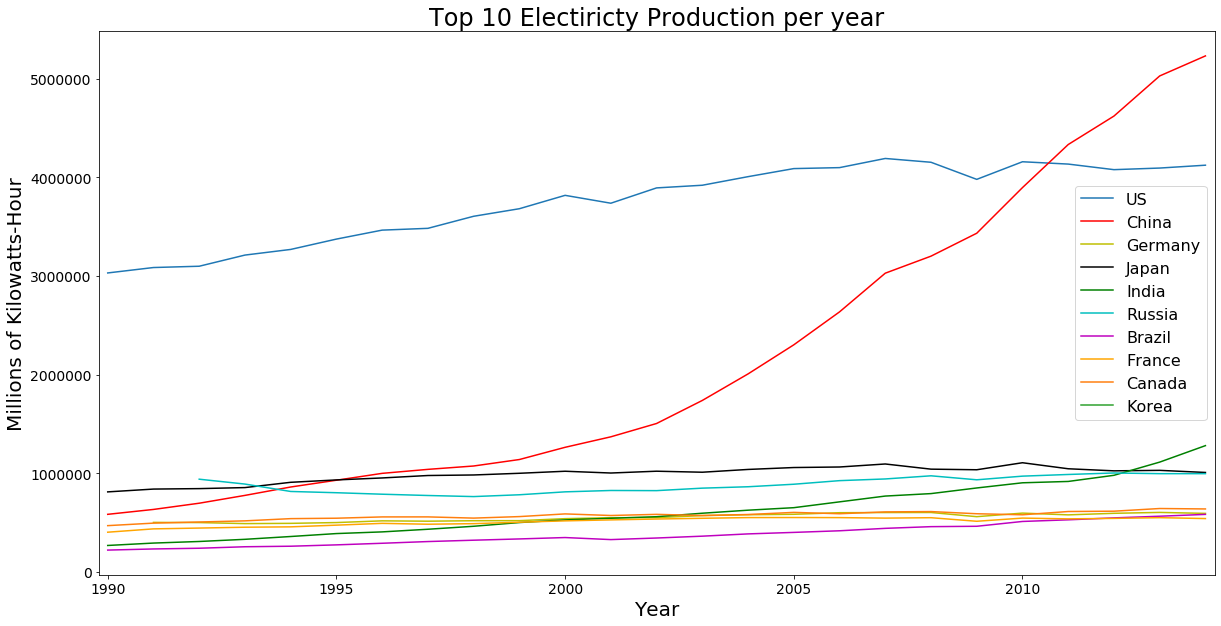

In [160]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(x1,y1,label="US")
plt.plot(x2,y2,'r',label="China")
plt.plot(x3,y3,'y',label="Germany")
plt.plot(x4,y4,'k',label="Japan")
plt.plot(x5,y5,'g',label="India")
plt.plot(x6,y6,'c',label="Russia")
plt.plot(x7,y7,'m',label="Brazil")
plt.plot(x8,y8,'orange',label="France")
plt.plot(x9,y9,label="Canada")
plt.plot(x10,y10,label="Korea")

plt.legend(fontsize=16)
plt.ylabel("Millions of Kilowatts-Hour",fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Top 10 Electiricty Production per year',fontsize=24)
plt.xlim(1989.8, 2014.2)
fig1 = plt.gcf()
plt.show()

In [161]:
fig1.savefig('Top 10 Electiricty Production per year.png')

# US

In [164]:
df_US = df[df.country_or_area == 'United States'].sort_values('year')
df_China = df[df.country_or_area == 'China'].sort_values('year')

In [165]:
US_Nuclear = df_US[df_US.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")
US_Wind = df_US[df_US.commodity_transaction == "Electricity - total wind production"].sort_values("year")
US_Solar = df_US[df_US.commodity_transaction == "Electricity - total solar production"].sort_values("year")
US_Crude_oil_production = df_US[df_US.commodity_transaction == "Conventional crude oil - production"].sort_values("year")
US_NaturalGas = df_US[df_US.commodity_transaction == "Natural gas (including LNG) - production"].sort_values("year")

In [166]:
x1 = US_Nuclear.year
y1 = US_Nuclear.quantity
x2 = US_Wind.year
y2 = US_Wind.quantity
x3 = US_Solar.year
y3 = US_Solar.quantity
x4 = US_Crude_oil_production.year
y4 = US_Crude_oil_production.quantity
x5 = US_NaturalGas.year
y5 = US_NaturalGas.quantity

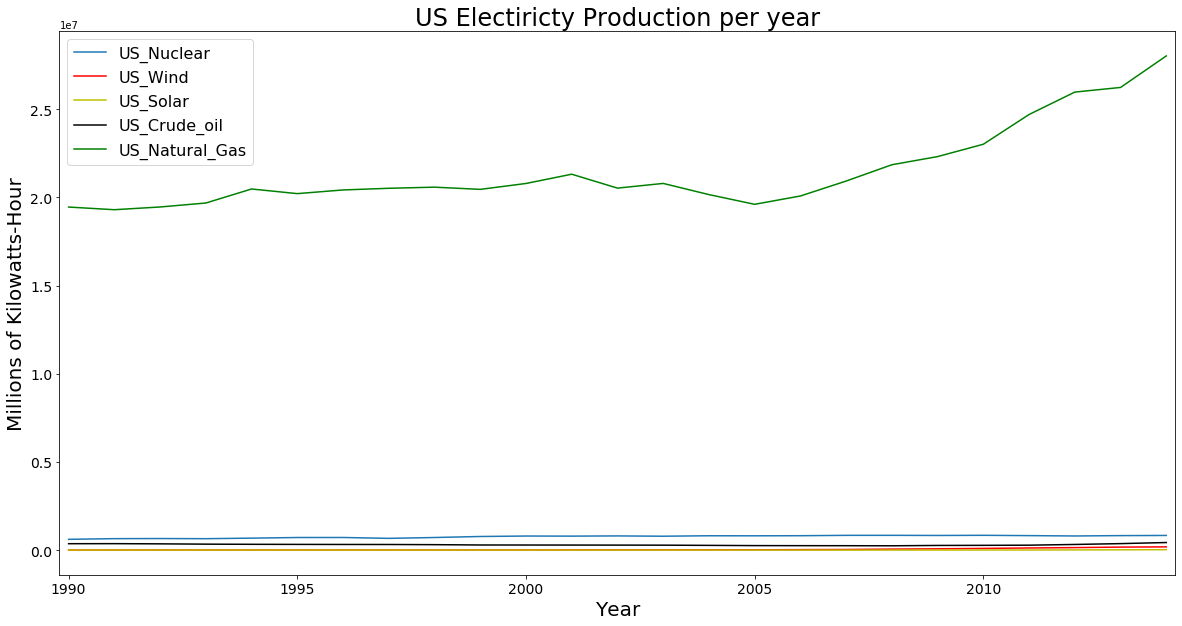

In [167]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(x1,y1,label="US_Nuclear")
plt.plot(x2,y2,'r',label="US_Wind")
plt.plot(x3,y3,'y',label="US_Solar")
plt.plot(x4,y4,'k',label="US_Crude_oil")
plt.plot(x5,y5,'g',label="US_Natural_Gas")

plt.legend(fontsize=16)
plt.ylabel("Millions of Kilowatts-Hour",fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('US Electiricty Production per year',fontsize=24)
plt.xlim(1989.8, 2014.2)
fig2 = plt.gcf()
plt.show()

In [162]:
fig2.savefig('US Electiricty Production per year.png')